In [4]:
import pandas as pd
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [9]:
data =pd.read_csv('E:/Donlow/kc_house_data.csv')

In [10]:
data.shape

(21613, 21)

In [11]:
pd.options.display.max_columns = 25

data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [12]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [13]:
data['year'] = pd.to_numeric(data['date'].str.slice(0,4))
data['month'] = pd.to_numeric(data['date'].str.slice(4,6))
data['day'] = pd.to_numeric(data['date'].str.slice(6,8))

data.drop(['id'],axis=1 , inplace=True)
data.drop(['date'],axis=1 , inplace=True)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


In [15]:
data_num = data.shape[0]
indexs = np.random.permutation(data_num)

train = indexs[:int(data_num*0.6)]
value = indexs[int(data_num*0.6):int(data_num*0.8)]
test = indexs[int(data_num*0.8):]

train_data = data.loc[train]
value_data = data.loc[value]
test_data = data.loc[test]

In [16]:
train_val_data = pd.concat([train_data , value_data])
mean = train_val_data.mean()
std = train_val_data.std()
train_data = (train_data - mean) / std

val_data = (value_data - mean) /std

In [18]:
x_train = np.array(train_data.drop('price',axis=1))
y_train = np.array(train_data['price'])
x_val = np.array(val_data.drop('price',axis=1))
y_val =np.array(val_data['price']) 

In [21]:
x_train.shape

(12967, 21)

In [25]:
model = keras.Sequential(name='model-1')

model.add(layers.Dense(64,activation='relu',input_shape=(21,)))

model.add(layers.Dense(64 , activation='relu'))

model.add(layers.Dense(1))

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model-1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1408      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,633
Trainable params: 5,633
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(keras.optimizers.Adam(0.001),
             loss=keras.losses.MeanSquaredError(),
             metrics=[keras.metrics.MeanAbsoluteError()])

In [27]:
model_dir = 'lab2/models/'
os.makedirs(model_dir)


In [115]:
log_dir = os.path.join('lab2-logs','model-1')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)

model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-1.h5',
                                            monitor='val_mean_absolute_error',
                                            save_best_only=True,
                                            mode='min')

In [116]:
print(model_mckp)

In [117]:
history = model.fit(x_train , y_train,
                   batch_size=64,
                   epochs=300,
                   validation_data=(x_val,y_val),
                   callbacks = [model_cbk,model_mckp])

Train on 12967 samples, validate on 4323 samples
Epoch 1/300
12967/12967 [==============================] - 0s 29us/sample - loss: 0.0175 - mean_absolute_error: 0.1002 - val_loss: 0.1832 - val_mean_absolute_error: 0.2384
Epoch 2/300
12967/12967 [==============================] - 0s 27us/sample - loss: 0.0172 - mean_absolute_error: 0.0999 - val_loss: 0.1844 - val_mean_absolute_error: 0.2378
Epoch 3/300
12967/12967 [==============================] - 0s 30us/sample - loss: 0.0166 - mean_absolute_error: 0.0977 - val_loss: 0.1818 - val_mean_absolute_error: 0.2384
Epoch 4/300
12967/12967 [==============================] - 0s 27us/sample - loss: 0.0164 - mean_absolute_error: 0.0976 - val_loss: 0.1850 - val_mean_absolute_error: 0.2382
Epoch 5/300
12967/12967 [==============================] - 0s 29us/sample - loss: 0.0165 - mean_absolute_error: 0.0980 - val_loss: 0.1790 - val_mean_absolute_error: 0.2367
Epoch 6/300
12967/12967 [==============================] - 0s 29us/sample - loss: 0.0171 - 

12967/12967 [==============================] - 1s 40us/sample - loss: 0.0168 - mean_absolute_error: 0.0983 - val_loss: 0.1820 - val_mean_absolute_error: 0.2371
Epoch 96/300
12967/12967 [==============================] - 0s 28us/sample - loss: 0.0166 - mean_absolute_error: 0.0980 - val_loss: 0.1814 - val_mean_absolute_error: 0.2403
Epoch 97/300
12967/12967 [==============================] - 1s 60us/sample - loss: 0.0161 - mean_absolute_error: 0.0972 - val_loss: 0.1868 - val_mean_absolute_error: 0.2399
Epoch 98/300
12967/12967 [==============================] - 0s 32us/sample - loss: 0.0161 - mean_absolute_error: 0.0968 - val_loss: 0.1845 - val_mean_absolute_error: 0.2383
Epoch 99/300
12967/12967 [==============================] - 1s 48us/sample - loss: 0.0168 - mean_absolute_error: 0.0986 - val_loss: 0.1849 - val_mean_absolute_error: 0.2425
Epoch 100/300
12967/12967 [==============================] - 0s 30us/sample - loss: 0.0169 - mean_absolute_error: 0.0987 - val_loss: 0.1832 - val_me

12967/12967 [==============================] - 0s 36us/sample - loss: 0.0239 - mean_absolute_error: 0.1113 - val_loss: 0.1773 - val_mean_absolute_error: 0.2376
Epoch 190/300
12967/12967 [==============================] - 0s 26us/sample - loss: 0.0208 - mean_absolute_error: 0.1056 - val_loss: 0.1869 - val_mean_absolute_error: 0.2392
Epoch 191/300
12967/12967 [==============================] - 1s 44us/sample - loss: 0.0169 - mean_absolute_error: 0.0988 - val_loss: 0.1803 - val_mean_absolute_error: 0.2397
Epoch 192/300
12967/12967 [==============================] - 0s 27us/sample - loss: 0.0160 - mean_absolute_error: 0.0966 - val_loss: 0.1857 - val_mean_absolute_error: 0.2409
Epoch 193/300
12967/12967 [==============================] - 1s 40us/sample - loss: 0.0165 - mean_absolute_error: 0.0976 - val_loss: 0.1806 - val_mean_absolute_error: 0.2394
Epoch 194/300
12967/12967 [==============================] - 0s 29us/sample - loss: 0.0173 - mean_absolute_error: 0.0989 - val_loss: 0.1759 - va

12967/12967 [==============================] - 0s 37us/sample - loss: 0.0157 - mean_absolute_error: 0.0959 - val_loss: 0.1854 - val_mean_absolute_error: 0.2395
Epoch 284/300
12967/12967 [==============================] - 0s 29us/sample - loss: 0.0154 - mean_absolute_error: 0.0953 - val_loss: 0.1813 - val_mean_absolute_error: 0.2410
Epoch 285/300
12967/12967 [==============================] - 0s 34us/sample - loss: 0.0156 - mean_absolute_error: 0.0959 - val_loss: 0.1796 - val_mean_absolute_error: 0.2391
Epoch 286/300
12967/12967 [==============================] - 1s 107us/sample - loss: 0.0160 - mean_absolute_error: 0.0972 - val_loss: 0.1799 - val_mean_absolute_error: 0.2408
Epoch 287/300
12967/12967 [==============================] - 1s 49us/sample - loss: 0.0158 - mean_absolute_error: 0.0959 - val_loss: 0.1881 - val_mean_absolute_error: 0.2410
Epoch 288/300
12967/12967 [==============================] - 0s 36us/sample - loss: 0.0167 - mean_absolute_error: 0.0987 - val_loss: 0.1867 - v

In [31]:
history.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

C:\Users\gg246\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Unrecognized location 'upeer right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  """


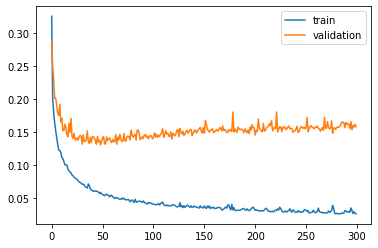

In [32]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.xlabel=('loss')
plt.ylabel=('epochs')
plt.legend(loc='upeer right')

C:\Users\gg246\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Unrecognized location 'upeer right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  """


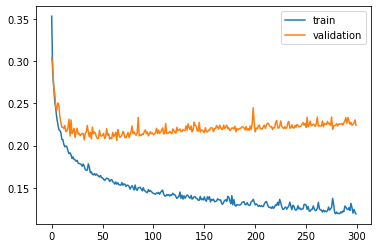

In [33]:
plt.plot(history.history['mean_absolute_error'],label='train')
plt.plot(history.history['val_mean_absolute_error'],label='validation')
plt.xlabel=('metrics')
plt.ylabel=('epochs')
plt.legend(loc='upeer right')

In [58]:
model.load_weights('lab2/models/Best-model-1.h5')

y_test = np.array(test_data['price'])

test = (test_data-mean)/std

x_test = np.array(test.drop('price',axis=1))

x_pred = model.predict(x_test)

x_pred = np.reshape(x_pred * std['price'] +mean['price'],y_test.shape)

per_error = np.mean(np.abs(y_test-x_pred))/np.mean(y_test) *100

print('Model error:{:.3f}'.format(per_error))

Model error:14.857


In [89]:
model2 = keras.Sequential(name='model-2')

model2.add(layers.Dense(16 , activation ='relu' , input_shape=(21,)))

model2.add(layers.Dense(16,activation = 'relu'))
model2.add(layers.Dense(1))

model2.compile(keras.optimizers.Adam(0.001),
               loss=keras.losses.MeanSquaredError(),
               metrics=[keras.metrics.MeanAbsoluteError()]
              )

log_dir = os.path.join('lab2','model2')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)

model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-2.h5',
                                            monitor='val_mean_absolute_error',
                                            save_best_only=True,
                                            mode='min')

model2.fit(x_train , y_train,
          batch_size=64,
          epochs=300,
          validation_data=(x_val , y_val),
          callbacks=[model_cbk , model_mckp])

Train on 12967 samples, validate on 4323 samples
Epoch 1/300
12967/12967 [==============================] - 1s 104us/sample - loss: 0.3203 - mean_absolute_error: 0.3730 - val_loss: 0.3541 - val_mean_absolute_error: 0.3392
Epoch 2/300
12967/12967 [==============================] - 0s 24us/sample - loss: 0.2384 - mean_absolute_error: 0.3139 - val_loss: 0.3028 - val_mean_absolute_error: 0.3179
Epoch 3/300
12967/12967 [==============================] - 0s 25us/sample - loss: 0.2166 - mean_absolute_error: 0.2991 - val_loss: 0.2839 - val_mean_absolute_error: 0.2994
Epoch 4/300
12967/12967 [==============================] - 0s 25us/sample - loss: 0.2012 - mean_absolute_error: 0.2854 - val_loss: 0.2659 - val_mean_absolute_error: 0.2904
Epoch 5/300
12967/12967 [==============================] - 0s 24us/sample - loss: 0.1910 - mean_absolute_error: 0.2761 - val_loss: 0.2482 - val_mean_absolute_error: 0.2785
Epoch 6/300
12967/12967 [==============================] - 0s 24us/sample - loss: 0.1795 -

12967/12967 [==============================] - 0s 28us/sample - loss: 0.0837 - mean_absolute_error: 0.1879 - val_loss: 0.1341 - val_mean_absolute_error: 0.2048
Epoch 96/300
12967/12967 [==============================] - 0s 29us/sample - loss: 0.0834 - mean_absolute_error: 0.1875 - val_loss: 0.1392 - val_mean_absolute_error: 0.2067
Epoch 97/300
12967/12967 [==============================] - 0s 26us/sample - loss: 0.0832 - mean_absolute_error: 0.1882 - val_loss: 0.1378 - val_mean_absolute_error: 0.2065
Epoch 98/300
12967/12967 [==============================] - 0s 28us/sample - loss: 0.0830 - mean_absolute_error: 0.1872 - val_loss: 0.1323 - val_mean_absolute_error: 0.2047
Epoch 99/300
12967/12967 [==============================] - 0s 35us/sample - loss: 0.0837 - mean_absolute_error: 0.1879 - val_loss: 0.1333 - val_mean_absolute_error: 0.2065
Epoch 100/300
12967/12967 [==============================] - 0s 28us/sample - loss: 0.0838 - mean_absolute_error: 0.1886 - val_loss: 0.1392 - val_me

12967/12967 [==============================] - 0s 24us/sample - loss: 0.0754 - mean_absolute_error: 0.1805 - val_loss: 0.1509 - val_mean_absolute_error: 0.2052
Epoch 190/300
12967/12967 [==============================] - 0s 22us/sample - loss: 0.0752 - mean_absolute_error: 0.1799 - val_loss: 0.1466 - val_mean_absolute_error: 0.2050
Epoch 191/300
12967/12967 [==============================] - 0s 22us/sample - loss: 0.0750 - mean_absolute_error: 0.1801 - val_loss: 0.1409 - val_mean_absolute_error: 0.2078
Epoch 192/300
12967/12967 [==============================] - 0s 22us/sample - loss: 0.0751 - mean_absolute_error: 0.1794 - val_loss: 0.1405 - val_mean_absolute_error: 0.2043
Epoch 193/300
12967/12967 [==============================] - 0s 23us/sample - loss: 0.0768 - mean_absolute_error: 0.1806 - val_loss: 0.1428 - val_mean_absolute_error: 0.2055
Epoch 194/300
12967/12967 [==============================] - 0s 22us/sample - loss: 0.0740 - mean_absolute_error: 0.1782 - val_loss: 0.1373 - va

Epoch 283/300
12967/12967 [==============================] - 0s 22us/sample - loss: 0.0724 - mean_absolute_error: 0.1773 - val_loss: 0.1376 - val_mean_absolute_error: 0.2043
Epoch 284/300
12967/12967 [==============================] - 0s 22us/sample - loss: 0.0718 - mean_absolute_error: 0.1762 - val_loss: 0.1463 - val_mean_absolute_error: 0.2048
Epoch 285/300
12967/12967 [==============================] - 0s 22us/sample - loss: 0.0717 - mean_absolute_error: 0.1771 - val_loss: 0.1464 - val_mean_absolute_error: 0.2051
Epoch 286/300
12967/12967 [==============================] - 0s 22us/sample - loss: 0.0716 - mean_absolute_error: 0.1765 - val_loss: 0.1445 - val_mean_absolute_error: 0.2049
Epoch 287/300
12967/12967 [==============================] - 0s 23us/sample - loss: 0.0716 - mean_absolute_error: 0.1758 - val_loss: 0.1432 - val_mean_absolute_error: 0.2069
Epoch 288/300
12967/12967 [==============================] - 0s 23us/sample - loss: 0.0715 - mean_absolute_error: 0.1763 - val_los

In [90]:
model3 = keras.Sequential(name='model-3')

model3.add(layers.Dense(64,kernel_regularizer=keras.regularizers.l2(0.001) , activation ='relu' , input_shape=(21,)))

model3.add(layers.Dense(64,kernel_regularizer=keras.regularizers.l2(0.001),activation = 'relu'))
model3.add(layers.Dense(1))

model3.compile(keras.optimizers.Adam(0.001),
               loss=keras.losses.MeanSquaredError(),
               metrics=[keras.metrics.MeanAbsoluteError()]
              )

log_dir = os.path.join('lab2','model3')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)

model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-3.h5',
                                            monitor='val_mean_absolute_error',
                                            save_best_only=True,
                                            mode='min')

model3.fit(x_train , y_train,
          batch_size=64,
          epochs=300,
          validation_data=(x_val , y_val),
          callbacks=[model_cbk , model_mckp])

Train on 12967 samples, validate on 4323 samples
Epoch 1/300
12967/12967 [==============================] - 1s 102us/sample - loss: 0.3898 - mean_absolute_error: 0.3439 - val_loss: 0.3584 - val_mean_absolute_error: 0.2917
Epoch 2/300
12967/12967 [==============================] - 0s 30us/sample - loss: 0.2808 - mean_absolute_error: 0.2793 - val_loss: 0.3226 - val_mean_absolute_error: 0.2822
Epoch 3/300
12967/12967 [==============================] - 0s 29us/sample - loss: 0.2480 - mean_absolute_error: 0.2594 - val_loss: 0.2806 - val_mean_absolute_error: 0.2645
Epoch 4/300
12967/12967 [==============================] - 0s 28us/sample - loss: 0.2282 - mean_absolute_error: 0.2459 - val_loss: 0.2702 - val_mean_absolute_error: 0.2654
Epoch 5/300
12967/12967 [==============================] - 1s 52us/sample - loss: 0.2100 - mean_absolute_error: 0.2350 - val_loss: 0.2453 - val_mean_absolute_error: 0.2456
Epoch 6/300
12967/12967 [==============================] - 0s 34us/sample - loss: 0.1982 -

12967/12967 [==============================] - 0s 27us/sample - loss: 0.0881 - mean_absolute_error: 0.1687 - val_loss: 0.1595 - val_mean_absolute_error: 0.2031
Epoch 96/300
12967/12967 [==============================] - 0s 28us/sample - loss: 0.0911 - mean_absolute_error: 0.1723 - val_loss: 0.1592 - val_mean_absolute_error: 0.2025
Epoch 97/300
12967/12967 [==============================] - 0s 30us/sample - loss: 0.0872 - mean_absolute_error: 0.1697 - val_loss: 0.1632 - val_mean_absolute_error: 0.1974
Epoch 98/300
12967/12967 [==============================] - 0s 28us/sample - loss: 0.0848 - mean_absolute_error: 0.1671 - val_loss: 0.1551 - val_mean_absolute_error: 0.2037
Epoch 99/300
12967/12967 [==============================] - 0s 28us/sample - loss: 0.0842 - mean_absolute_error: 0.1672 - val_loss: 0.1565 - val_mean_absolute_error: 0.1965
Epoch 100/300
12967/12967 [==============================] - 0s 27us/sample - loss: 0.0862 - mean_absolute_error: 0.1689 - val_loss: 0.1472 - val_me

12967/12967 [==============================] - 0s 27us/sample - loss: 0.0742 - mean_absolute_error: 0.1589 - val_loss: 0.1476 - val_mean_absolute_error: 0.1981
Epoch 190/300
12967/12967 [==============================] - 0s 28us/sample - loss: 0.0750 - mean_absolute_error: 0.1600 - val_loss: 0.1462 - val_mean_absolute_error: 0.1941
Epoch 191/300
12967/12967 [==============================] - 0s 27us/sample - loss: 0.0786 - mean_absolute_error: 0.1633 - val_loss: 0.1589 - val_mean_absolute_error: 0.2099
Epoch 192/300
12967/12967 [==============================] - 0s 28us/sample - loss: 0.0799 - mean_absolute_error: 0.1647 - val_loss: 0.1584 - val_mean_absolute_error: 0.2050
Epoch 193/300
12967/12967 [==============================] - 0s 27us/sample - loss: 0.0935 - mean_absolute_error: 0.1713 - val_loss: 0.1790 - val_mean_absolute_error: 0.2236
Epoch 194/300
12967/12967 [==============================] - 0s 28us/sample - loss: 0.0798 - mean_absolute_error: 0.1651 - val_loss: 0.1602 - va

12967/12967 [==============================] - 0s 27us/sample - loss: 0.0721 - mean_absolute_error: 0.1579 - val_loss: 0.1523 - val_mean_absolute_error: 0.1977
Epoch 284/300
12967/12967 [==============================] - 0s 28us/sample - loss: 0.0698 - mean_absolute_error: 0.1557 - val_loss: 0.1560 - val_mean_absolute_error: 0.2052
Epoch 285/300
12967/12967 [==============================] - 0s 27us/sample - loss: 0.0750 - mean_absolute_error: 0.1599 - val_loss: 0.1493 - val_mean_absolute_error: 0.1959
Epoch 286/300
12967/12967 [==============================] - 0s 28us/sample - loss: 0.0738 - mean_absolute_error: 0.1579 - val_loss: 0.1511 - val_mean_absolute_error: 0.1972
Epoch 287/300
12967/12967 [==============================] - 0s 27us/sample - loss: 0.0713 - mean_absolute_error: 0.1560 - val_loss: 0.1519 - val_mean_absolute_error: 0.1989
Epoch 288/300
12967/12967 [==============================] - 0s 29us/sample - loss: 0.0703 - mean_absolute_error: 0.1567 - val_loss: 0.1596 - va

In [91]:
model4 = keras.Sequential(name='model-4')

model4.add(layers.Dense(64, activation ='relu' , input_shape=(21,)))

model4.add(layers.Dropout(0.3))
model4.add(layers.Dense(64,activation = 'relu'))
model4.add(layers.Dropout(0.3))
model4.add(layers.Dense(1))

model4.compile(keras.optimizers.Adam(0.001),
               loss=keras.losses.MeanSquaredError(),
               metrics=[keras.metrics.MeanAbsoluteError()]
              )

log_dir = os.path.join('lab2','model4')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)

model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-4.h5',
                                            monitor='val_mean_absolute_error',
                                            save_best_only=True,
                                            mode='min')

model4.fit(x_train , y_train,
          batch_size=64,
          epochs=300,
          validation_data=(x_val , y_val),
          callbacks=[model_cbk , model_mckp])

Train on 12967 samples, validate on 4323 samples
Epoch 1/300
12967/12967 [==============================] - 2s 117us/sample - loss: 0.5492 - mean_absolute_error: 0.4785 - val_loss: 0.3713 - val_mean_absolute_error: 0.3303
Epoch 2/300
12967/12967 [==============================] - 1s 42us/sample - loss: 0.3215 - mean_absolute_error: 0.3674 - val_loss: 0.3145 - val_mean_absolute_error: 0.3139
Epoch 3/300
12967/12967 [==============================] - 0s 38us/sample - loss: 0.2826 - mean_absolute_error: 0.3370 - val_loss: 0.2704 - val_mean_absolute_error: 0.3068
Epoch 4/300
12967/12967 [==============================] - 0s 38us/sample - loss: 0.2708 - mean_absolute_error: 0.3225 - val_loss: 0.2459 - val_mean_absolute_error: 0.2929
Epoch 5/300
12967/12967 [==============================] - 0s 36us/sample - loss: 0.2383 - mean_absolute_error: 0.3108 - val_loss: 0.2761 - val_mean_absolute_error: 0.2948
Epoch 6/300
12967/12967 [==============================] - 0s 37us/sample - loss: 0.2343 -

12967/12967 [==============================] - 0s 35us/sample - loss: 0.1288 - mean_absolute_error: 0.2274 - val_loss: 0.1364 - val_mean_absolute_error: 0.2376
Epoch 96/300
12967/12967 [==============================] - 0s 36us/sample - loss: 0.1214 - mean_absolute_error: 0.2241 - val_loss: 0.1284 - val_mean_absolute_error: 0.2215
Epoch 97/300
12967/12967 [==============================] - 0s 35us/sample - loss: 0.1255 - mean_absolute_error: 0.2270 - val_loss: 0.1468 - val_mean_absolute_error: 0.2209
Epoch 98/300
12967/12967 [==============================] - 1s 39us/sample - loss: 0.1159 - mean_absolute_error: 0.2228 - val_loss: 0.1424 - val_mean_absolute_error: 0.2201
Epoch 99/300
12967/12967 [==============================] - 0s 39us/sample - loss: 0.1245 - mean_absolute_error: 0.2242 - val_loss: 0.1293 - val_mean_absolute_error: 0.2180
Epoch 100/300
12967/12967 [==============================] - 0s 38us/sample - loss: 0.1225 - mean_absolute_error: 0.2240 - val_loss: 0.1510 - val_me

12967/12967 [==============================] - 0s 38us/sample - loss: 0.1187 - mean_absolute_error: 0.2207 - val_loss: 0.1587 - val_mean_absolute_error: 0.2335
Epoch 190/300
12967/12967 [==============================] - 0s 35us/sample - loss: 0.1134 - mean_absolute_error: 0.2165 - val_loss: 0.1225 - val_mean_absolute_error: 0.2227
Epoch 191/300
12967/12967 [==============================] - 0s 34us/sample - loss: 0.1169 - mean_absolute_error: 0.2203 - val_loss: 0.1306 - val_mean_absolute_error: 0.2178
Epoch 192/300
12967/12967 [==============================] - 0s 34us/sample - loss: 0.1134 - mean_absolute_error: 0.2174 - val_loss: 0.1340 - val_mean_absolute_error: 0.2330
Epoch 193/300
12967/12967 [==============================] - 0s 35us/sample - loss: 0.1176 - mean_absolute_error: 0.2198 - val_loss: 0.1372 - val_mean_absolute_error: 0.2307
Epoch 194/300
12967/12967 [==============================] - 0s 35us/sample - loss: 0.1200 - mean_absolute_error: 0.2203 - val_loss: 0.1251 - va

12967/12967 [==============================] - 1s 40us/sample - loss: 0.1113 - mean_absolute_error: 0.2175 - val_loss: 0.1471 - val_mean_absolute_error: 0.2367
Epoch 284/300
12967/12967 [==============================] - 0s 37us/sample - loss: 0.1116 - mean_absolute_error: 0.2139 - val_loss: 0.1255 - val_mean_absolute_error: 0.2115
Epoch 285/300
12967/12967 [==============================] - 0s 35us/sample - loss: 0.1147 - mean_absolute_error: 0.2151 - val_loss: 0.1290 - val_mean_absolute_error: 0.2146
Epoch 286/300
12967/12967 [==============================] - 0s 35us/sample - loss: 0.1048 - mean_absolute_error: 0.2153 - val_loss: 0.1407 - val_mean_absolute_error: 0.2220
Epoch 287/300
12967/12967 [==============================] - 0s 37us/sample - loss: 0.1049 - mean_absolute_error: 0.2114 - val_loss: 0.1469 - val_mean_absolute_error: 0.2279
Epoch 288/300
12967/12967 [==============================] - 0s 36us/sample - loss: 0.1161 - mean_absolute_error: 0.2182 - val_loss: 0.1464 - va

In [94]:
model2.load_weights('lab2/models/Best-model-2.h5')


x_pred = model2.predict(x_test)

x_pred = np.reshape(x_pred * std['price'] +mean['price'],y_test.shape)

per_error = np.mean(np.abs(y_test-x_pred))/np.mean(y_test) *100

print('Model error:{:.3f}'.format(per_error))

Model error:13.266


In [97]:
model3.load_weights('lab2/models/Best-model-3.h5')


x_pred = model3.predict(x_test)

x_pred = np.reshape(x_pred * std['price'] +mean['price'],y_test.shape)

per_error = np.mean(np.abs(y_test-x_pred))/np.mean(y_test) *100

print('Model error:{:.3f}'.format(per_error))

Model error:12.710


In [98]:
model4.load_weights('lab2/models/Best-model-4.h5')


x_pred = model4.predict(x_test)

x_pred = np.reshape(x_pred * std['price'] +mean['price'],y_test.shape)

per_error = np.mean(np.abs(y_test-x_pred))/np.mean(y_test) *100

print('Model error:{:.3f}'.format(per_error))

Model error:13.823


In [100]:
%load_ext tensorboard

%tensorboard --logdir lab2-models

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 15276.

In [108]:
%reload_ext tensorboard

In [121]:
%tensorboard --logdir lab2-logs

Reusing TensorBoard on port 6006 (pid 2028), started 1:59:56 ago. (Use '!kill 2028' to kill it.)